In [3]:
#Install packages
message = FALSE
warning = FALSE
library(stringi)
library(data.table)
library(tools)
library(data.table)
library(stringdist)
library(stringr)
library(scales)
library(ggplot2)
library(Biostrings)
library(stringr)
library(dplyr)
library(gridExtra)
library(vcfR)
library(SNPRelate)
#Set working directory 
setwd("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed")

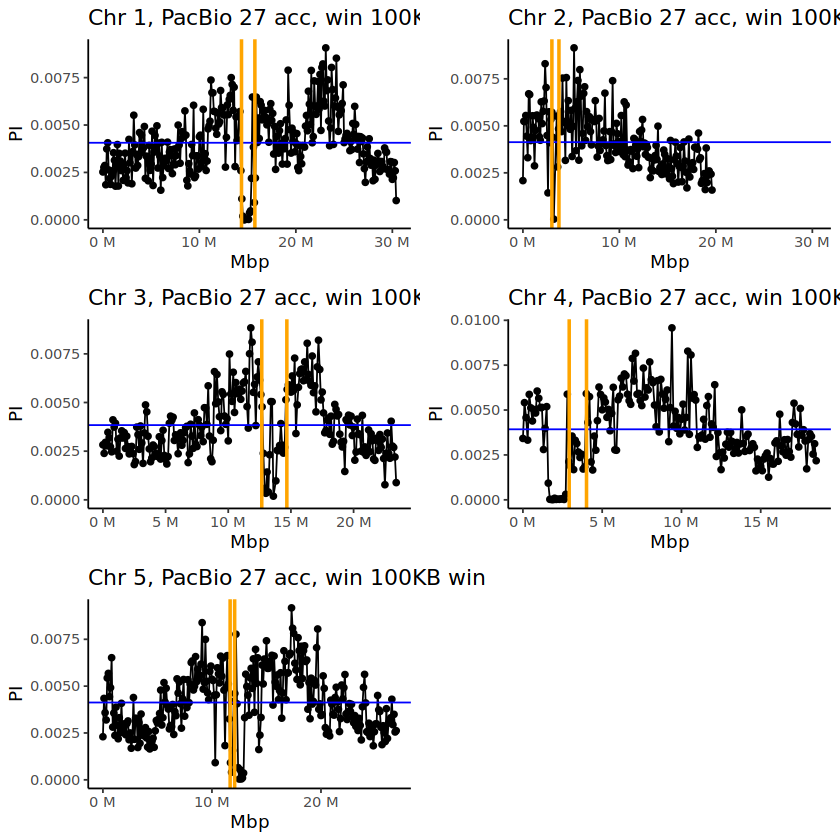

In [132]:
#Read PI estimates made by vcftools 
pi.chr1 <- read.table("vcftools_pi/chr1_27acc_corrected_pi_100KB.windowed.pi",header=T)
pi.chr2 <- read.table("vcftools_pi/chr2_27acc_corrected_pi_100KB.windowed.pi",header=T)
pi.chr3 <- read.table("vcftools_pi/chr3_27acc_corrected_pi_100KB.windowed.pi",header=T)
pi.chr4 <- read.table("vcftools_pi/chr4_27acc_corrected_pi_100KB.windowed.pi",header=T)
pi.chr5 <- read.table("vcftools_pi/chr5_27acc_corrected_pi_100KB.windowed.pi",header=T)
#pi.chr3 <- read.table("vcftools_pi/chr2_27acc_corrected_pi_100KB.windowed.pi",header=T)
chr1 <- ggplot(data=pi.chr1, aes(x=BIN_START, y=(PI))) +
    geom_line() + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr1$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI")+geom_point() + ggtitle("Chr 1, PacBio 27 acc, win 100KB win") +  geom_hline(yintercept =  mean(pi.chr1$PI),  color = "blue", size=0.5) + 
geom_vline(xintercept=14364752, color="orange",size=1) + geom_vline(xintercept=15750321, color="orange",size=1)

chr2 <- ggplot(data=pi.chr2, aes(x=BIN_START, y=(PI))) +
    geom_line() + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr1$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI")+geom_point() + ggtitle("Chr 2, PacBio 27 acc, win 100KB win") +  geom_hline(yintercept =  mean(pi.chr2$PI),  color = "blue", size=0.5) + 
geom_vline(xintercept=3002775, color="orange",size=1) + geom_vline(xintercept=3735247, color="orange",size=1)

chr3 <- ggplot(data=pi.chr3, aes(x=BIN_START, y=(PI))) +
  geom_line() + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr3$BIN_START)), y = c(0, NA)) +
  scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI")+geom_point() + ggtitle("Chr 3, PacBio 27 acc, win 100KB win") + geom_hline(yintercept =  mean(pi.chr3$PI),  color = "blue", size=0.5) +
geom_vline(xintercept=12674550, color="orange",size=1) + geom_vline(xintercept=14674767, color="orange",size=1)

chr4 <- ggplot(data=pi.chr4, aes(x=BIN_START, y=(PI))) +
  geom_line() + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr4$BIN_START)), y = c(0, NA)) +
  scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI")+geom_point() + ggtitle("Chr 4, PacBio 27 acc, win 100KB win") + geom_hline(yintercept = mean(pi.chr4$PI),  color = "blue", size=0.5) +
geom_vline(xintercept=2919690, color="orange",size=1) + geom_vline(xintercept=4011692, color="orange",size=1)

chr5 <- ggplot(data=pi.chr5, aes(x=BIN_START, y=(PI))) +
  geom_line() + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr4$BIN_START)), y = c(0, NA)) +
  scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI")+geom_point() + ggtitle("Chr 5, PacBio 27 acc, win 100KB win") + geom_hline(yintercept =  mean(pi.chr5$PI),  color = "blue", size=0.5) +
geom_vline(xintercept=11668616, color="orange",size=1) + geom_vline(xintercept=12082583, color="orange",size=1)

#Arrange in one plot
grid.arrange(chr1, chr2, chr3, chr4,chr5, ncol=2, nrow =3)



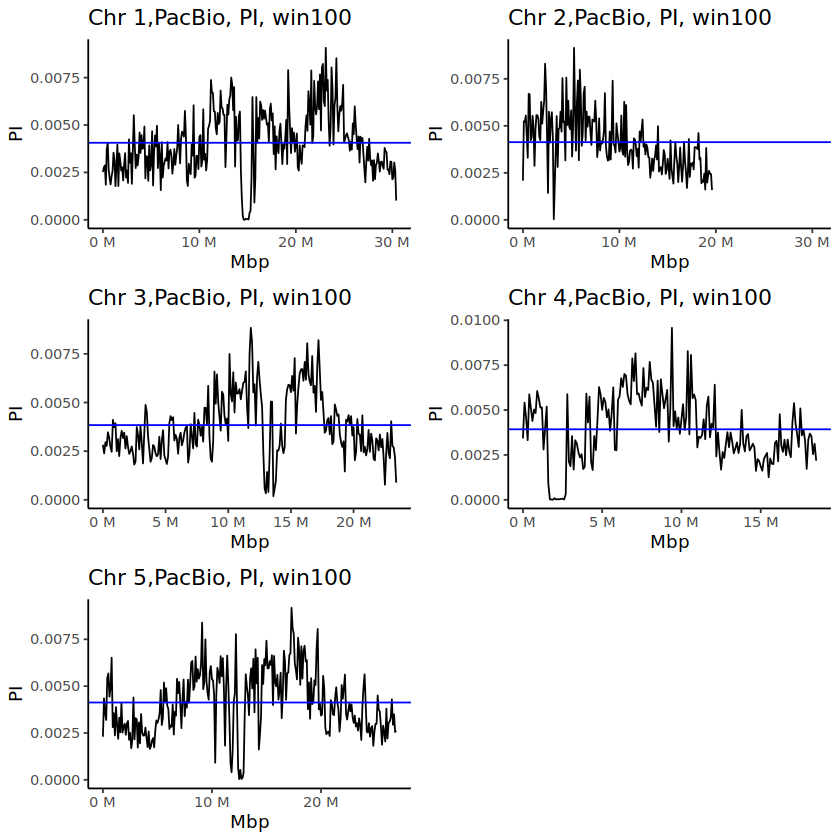

In [143]:
#Plots without centromere
#Read PI estimates made by vcftools 
pi.chr1 <- read.table("vcftools_pi/chr1_27acc_corrected_pi_100KB.windowed.pi",header=T)
pi.chr2 <- read.table("vcftools_pi/chr2_27acc_corrected_pi_100KB.windowed.pi",header=T)
pi.chr3 <- read.table("vcftools_pi/chr3_27acc_corrected_pi_100KB.windowed.pi",header=T)
pi.chr4 <- read.table("vcftools_pi/chr4_27acc_corrected_pi_100KB.windowed.pi",header=T)
pi.chr5 <- read.table("vcftools_pi/chr5_27acc_corrected_pi_100KB.windowed.pi",header=T)
#pi.chr3 <- read.table("vcftools_pi/chr2_27acc_corrected_pi_100KB.windowed.pi",header=T)
chr1 <- ggplot(data=pi.chr1, aes(x=BIN_START, y=(PI))) +
    geom_line(size=0.5) + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr1$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI") + ggtitle("Chr 1,PacBio, PI, win100") +  geom_hline(yintercept =  mean(pi.chr1$PI),  color = "blue", size=0.5) 
chr2 <- ggplot(data=pi.chr2, aes(x=BIN_START, y=(PI))) +
    geom_line(size=0.5) + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr1$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI") + ggtitle("Chr 2,PacBio, PI, win100") +  geom_hline(yintercept =  mean(pi.chr2$PI),  color = "blue", size=0.5)  

chr3 <- ggplot(data=pi.chr3, aes(x=BIN_START, y=(PI))) +
  geom_line(size=0.5) + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr3$BIN_START)), y = c(0, NA)) +
  scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI") + ggtitle("Chr 3,PacBio, PI, win100") + geom_hline(yintercept =  mean(pi.chr3$PI),  color = "blue", size=0.5) 

chr4 <- ggplot(data=pi.chr4, aes(x=BIN_START, y=(PI))) +
  geom_line(size=0.5) + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr4$BIN_START)), y = c(0, NA)) +
  scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI") + ggtitle("Chr 4,PacBio, PI, win100") + geom_hline(yintercept = mean(pi.chr4$PI),  color = "blue", size=0.5) 

chr5 <- ggplot(data=pi.chr5, aes(x=BIN_START, y=(PI))) +
  geom_line(size=0.5) + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr4$BIN_START)), y = c(0, NA)) +
  scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI") + ggtitle("Chr 5,PacBio, PI, win100") + geom_hline(yintercept =  mean(pi.chr5$PI),  color = "blue", size=0.5) 

#Arrange in one plot
grid.arrange(chr1, chr2, chr3, chr4,chr5, ncol=2, nrow=3)



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


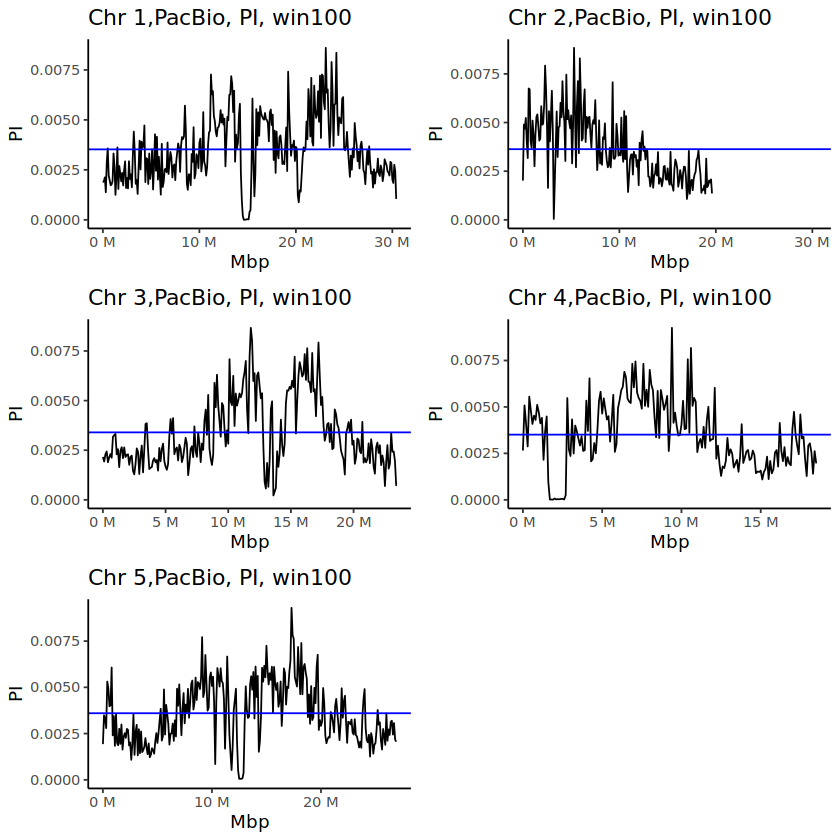

In [40]:
#Read PI estimates made by vcftools for without ourliers
pi.chr1 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/restriced_admixture_samples/pi_vcftools_restricted_samples/chr1_27acc_corrected_wo_outliers.recode.vcf.windowed.pi",header=T)
pi.chr2 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/restriced_admixture_samples/pi_vcftools_restricted_samples/chr2_27acc_corrected_wo_outliers.recode.vcf.windowed.pi",header=T)
pi.chr3 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/restriced_admixture_samples/pi_vcftools_restricted_samples/chr3_27acc_corrected_wo_outliers.recode.vcf.windowed.pi",header=T)
pi.chr4 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/restriced_admixture_samples/pi_vcftools_restricted_samples/chr4_27acc_corrected_wo_outliers.recode.vcf.windowed.pi",header=T)
pi.chr5 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/restriced_admixture_samples/pi_vcftools_restricted_samples/chr5_27acc_corrected_wo_outliers.recode.vcf.windowed.pi",header=T)
#pi.chr3 <- read.table("vcftools_pi/chr2_27acc_corrected_pi_100KB.windowed.pi",header=T)
chr1 <- ggplot(data=pi.chr1, aes(x=BIN_START, y=(PI))) +
    geom_line(size=0.5) + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr1$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI") + ggtitle("Chr 1,PacBio, PI, win100") +  geom_hline(yintercept =  mean(pi.chr1$PI),  color = "blue", size=0.5) 
chr2 <- ggplot(data=pi.chr2, aes(x=BIN_START, y=(PI))) +
    geom_line(size=0.5) + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr1$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI") + ggtitle("Chr 2,PacBio, PI, win100") +  geom_hline(yintercept =  mean(pi.chr2$PI),  color = "blue", size=0.5)  

chr3 <- ggplot(data=pi.chr3, aes(x=BIN_START, y=(PI))) +
  geom_line(size=0.5) + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr3$BIN_START)), y = c(0, NA)) +
  scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI") + ggtitle("Chr 3,PacBio, PI, win100") + geom_hline(yintercept =  mean(pi.chr3$PI),  color = "blue", size=0.5) 

chr4 <- ggplot(data=pi.chr4, aes(x=BIN_START, y=(PI))) +
  geom_line(size=0.5) + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr4$BIN_START)), y = c(0, NA)) +
  scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI") + ggtitle("Chr 4,PacBio, PI, win100") + geom_hline(yintercept = mean(pi.chr4$PI),  color = "blue", size=0.5) 

chr5 <- ggplot(data=pi.chr5, aes(x=BIN_START, y=(PI))) +
  geom_line(size=0.5) + expand_limits(x = c(min(pi.chr1$BIN_START), max(pi.chr4$BIN_START)), y = c(0, NA)) +
  scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI") + ggtitle("Chr 5,PacBio, PI, win100") + geom_hline(yintercept =  mean(pi.chr5$PI),  color = "blue", size=0.5) 

#Arrange in one plot
grid.arrange(chr1, chr2, chr3, chr4,chr5, ncol=2, nrow=3)

In [ ]:
####Plot Tajima’s's D
taj_chr1 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/tadjimas_d/chr1_27_acc_tadjimas_d.Tajima.D",header=T)
taj_chr2 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/tadjimas_d/chr2_27_acc_tadjimas_d.Tajima.D",header=T)
taj_chr3 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/tadjimas_d/chr3_27_acc_tadjimas_d.Tajima.D",header=T)
taj_chr4 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/tadjimas_d/chr4_27_acc_tadjimas_d.Tajima.D",header=T)
taj_chr5 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/tadjimas_d/chr5_27_acc_tadjimas_d.Tajima.D",header=T)

#Plot of Tajima’s D
chr1_tj <-ggplot(data=taj_chr1, aes(x=BIN_START, y=(TajimaD))) +
    geom_line() + expand_limits(x = c(min(taj_chr1$BIN_START), max(taj_chr1$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("Tajima’s D")  

chr2_tj <-ggplot(data=taj_chr2, aes(x=BIN_START, y=(TajimaD))) +
    geom_line() + expand_limits(x = c(min(taj_chr2$BIN_START), max(taj_chr2$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("Tajima’s D")  

chr3_tj <-ggplot(data=taj_chr3, aes(x=BIN_START, y=(TajimaD))) +
    geom_line() + expand_limits(x = c(min(taj_chr3$BIN_START), max(taj_chr3$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("Tajima’s D")  

chr4_tj <-ggplot(data=taj_chr4, aes(x=BIN_START, y=(TajimaD))) +
    geom_line() + expand_limits(x = c(min(taj_chr4$BIN_START), max(taj_chr4$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("Tajima’s D")  

chr5_tj <-ggplot(data=taj_chr5, aes(x=BIN_START, y=(TajimaD))) +
    geom_line() + expand_limits(x = c(min(taj_chr5$BIN_START), max(taj_chr5$BIN_START)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("Tajima’s D")  

grid.arrange(chr1_tj, chr2_tj, chr3_tj, chr4_tj,chr5_tj, ncol=1, nrow =5)


In [ ]:
#Extract 1 from windows to add Tadjima's D to PI plot 
pi.chr1$BIN_START <- pi.chr1$BIN_START-1

pi.chr2$BIN_START <- pi.chr2$BIN_START-1

pi.chr3$BIN_START <- pi.chr3$BIN_START-1

pi.chr4$BIN_START <- pi.chr4$BIN_START-1

pi.chr5$BIN_START <- pi.chr5$BIN_START-1


In [ ]:
#Merge PI and Tadjima's D
prescription = merge(pi.chr1, taj_chr1, by="BIN_START")
prescription2 = merge(pi.chr2, taj_chr2, by="BIN_START")
prescription3 = merge(pi.chr3, taj_chr3, by="BIN_START")
prescription4 = merge(pi.chr4, taj_chr4, by="BIN_START")
prescription5 = merge(pi.chr5, taj_chr5, by="BIN_START")
prescription <-prescription %>% select (BIN_START,PI,TajimaD)
prescription2 <-prescription2 %>% select (BIN_START,PI,TajimaD)
prescription3 <-prescription3 %>% select (BIN_START,PI,TajimaD)
prescription4 <-prescription4 %>% select (BIN_START,PI,TajimaD)
prescription5 <-prescription5 %>% select (BIN_START,PI,TajimaD)

In [ ]:
# Function factory for secondary axis transforms
train_sec <- function(primary, secondary, na.rm = TRUE) {
  # Thanks Henry Holm for including the na.rm argument!
  from <- range(secondary, na.rm = na.rm)
  to   <- range(primary, na.rm = na.rm)
  # Forward transform for the data
  forward <- function(x) {
    rescale(x, from = from, to = to)
  }
  # Reverse transform for the secondary axis
  reverse <- function(x) {
    rescale(x, from = to, to = from)
  }
  list(fwd = forward, rev = reverse)
}

In [ ]:
#Adding secondary axis 
sec <- with(prescription, train_sec(PI, TajimaD))
sec2 <- with(prescription2, train_sec(PI, TajimaD))
sec3 <- with(prescription3, train_sec(PI, TajimaD))
sec4 <- with(prescription4, train_sec(PI, TajimaD))
sec5 <- with(prescription5, train_sec(PI, TajimaD))

In [ ]:
#Plot PI plus Tajima's D
chr1_t_pi <-  ggplot(prescription, aes(BIN_START)) +
  geom_line(aes(y = PI), colour = "blue") +
  geom_line(aes(y = sec$fwd(TajimaD)), colour = "red") +
  scale_y_continuous(sec.axis = sec_axis(~sec$rev(.), name = "TajimaD")) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() + xlab("Mbp")

chr2_t_pi <-  ggplot(prescription2, aes(BIN_START)) +
  geom_line(aes(y = PI), colour = "blue") +
  geom_line(aes(y = sec2$fwd(TajimaD)), colour = "red") +
  scale_y_continuous(sec.axis = sec_axis(~sec$rev(.), name = "TajimaD")) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")

chr3_t_pi <-  ggplot(prescription3, aes(BIN_START)) +
  geom_line(aes(y = PI), colour = "blue") +
  geom_line(aes(y = sec3$fwd(TajimaD)), colour = "red") +
  scale_y_continuous(sec.axis = sec_axis(~sec$rev(.), name = "TajimaD")) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() + xlab("Mbp")

chr4_t_pi <-  ggplot(prescription4, aes(BIN_START)) +
  geom_line(aes(y = PI), colour = "blue") +
  geom_line(aes(y = sec4$fwd(TajimaD)), colour = "red") +
  scale_y_continuous(sec.axis = sec_axis(~sec$rev(.), name = "TajimaD")) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() + xlab("Mbp")

chr5_t_pi <-  ggplot(prescription5, aes(BIN_START)) +
  geom_line(aes(y = PI), colour = "blue") +
  geom_line(aes(y = sec5$fwd(TajimaD)), colour = "red") +
  scale_y_continuous(sec.axis = sec_axis(~sec$rev(.), name = "TajimaD")) + 
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() + xlab("Mbp")

grid.arrange(chr1_t_pi, chr2_t_pi, chr3_t_pi, chr4_t_pi,chr5_t_pi, ncol=1, nrow =5)

In [20]:
#Read info about centromeres location
centromeres  <-  read.csv("vcftools_pi/centromeres_info.txt",sep="\t")
###PCA plot
#Create vcf object for each chromosome
vcf_chr1 <-"/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorphism_annas_snps/hmp_parsed/pca_plot/chr1_27acc_corrected.vcf.gz"
snpgdsVCF2GDS(vcf_chr1, "ccm.gds",  method="biallelic.only")
# ccm_pca<-snpgdsPCA(genofile)
# plot(ccm_pca$eigenvect[,1],ccm_pca$eigenvect[,2] ,col=as.numeric(substr(ccm_pca$sample, 1,3) == 'CCM')+3, pch=10)
genofile <- openfn.gds("ccm.gds") #Read converted genofile
pop_code <- read.csv("pca_plot/admixture_groups.csv", sep='\t') #Read population structure
pca<-snpgdsPCA(genofile, autosome.only=FALSE, num.thread=4) #Create PCA object 

Chr,start,end
<int>,<int>,<int>
1,14364752,15750321
2,3002775,3735247
3,12674550,14674767
4,2919690,4011692
5,11668616,12082583


In [34]:
#Introduce percent in PCA axis 
pc.percent <- pca$varprop*100
head(round(pc.percent, 2))

[1] 9.10 7.51 6.32 5.97 5.77 5.48

In [21]:
#Create tab based on PCA with population code 
tab <- data.frame(sample.id = pca$sample.id,
              pop_code[order(match((pop_code$sample.id),(pca$sample.id))),],
              PC1 = pca$eigenvect[,1],    # the first eigenvector
              PC2 = pca$eigenvect[,2],    # the second eigenvector
              stringsAsFactors = FALSE)

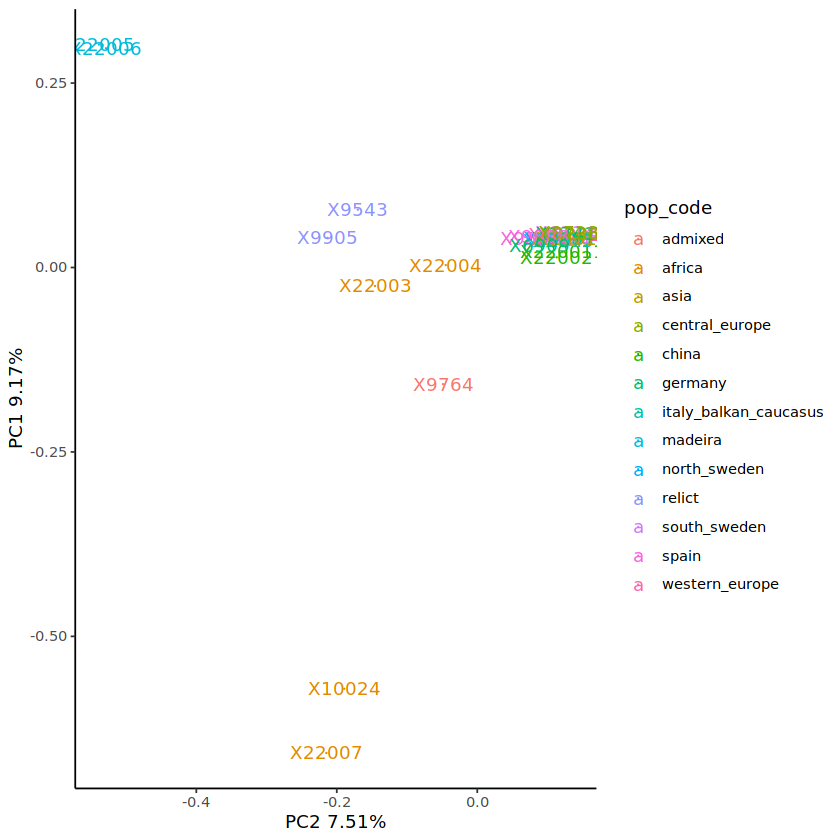

In [38]:
#Perform plot 
ggplot(tab,aes(x=PC1,y=PC2,col=pop_code,label=sample.id))+
   geom_point(size=0,alpha=2)+ 
   theme_classic() + geom_text()+xlab("PC2 7.51%") + ylab ("PC1 9.17%")


In [25]:
###Plot PI estimated by hands  
pi.chr1 <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/004_polymorph ism_annas_snps/hmp_parsed/pi_by_hand/pi_chr1.csv",header=T, sep=",")
ggplot(data=pi.chr1, aes(x=start, y=(pi))) +
    geom_line() + expand_limits(x = c(min(pi.chr1$start), max(pi.chr1$start)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("PI")+geom_point() + ggtitle("Chr 1, PacBio 27 acc, win 100KB win")

In [158]:
###Plot fixed divergence for Chr1 calculated by hand 
#Nonsynonimous divergence

div.chr1_nonsyn <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/009_divergence/thaliana_vs_lyrata/fix_div_chr1_non_syn.csv",header=T, sep=",")

ggplot(data=div.chr1_nonsyn, aes(x=div.chr1_nonsyn$start, y=(div.chr1_nonsyn$fix_div))) +
    geom_line(color="brown") + expand_limits(x = c(min(div.chr1_nonsyn$start), max(div.chr1_nonsyn$start)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("fixed divergence")+ ggtitle("Chr 1, win 200KB win,50KB slided fix.D nonsyn A.lyrata") 

ERROR: Error in unit_format(unit = "M", scale = 1e-06): could not find function "unit_format"


In [159]:
#Synonimous divergence 
div.chr1_syn <- read.table("/groups/nordborg/user/elizaveta.grigoreva/genome_evolution_pacbio/analyses/009_divergence/thaliana_vs_lyrata/fix_div_chr1_syn.csv",header=T, sep=",")

ggplot(data=div.chr1_syn, aes(x=div.chr1_syn$start, y=(div.chr1_syn$fix_div))) +
    geom_line(color="blue") + expand_limits(x = c(min(div.chr1_syn$start), max(div.chr1_syn$start)), y = c(0, NA)) +
    scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp")+ylab("fixed divergence")+ ggtitle("Chr 1, win 200KB win,50KB slided fix.D syn A.lyrata") 


ERROR: Error in unit_format(unit = "M", scale = 1e-06): could not find function "unit_format"


In [160]:
#Merge syn and non syn divergence 
pol_non_pol <- merge(div.chr1_nonsyn,div.chr1_syn,by="start")

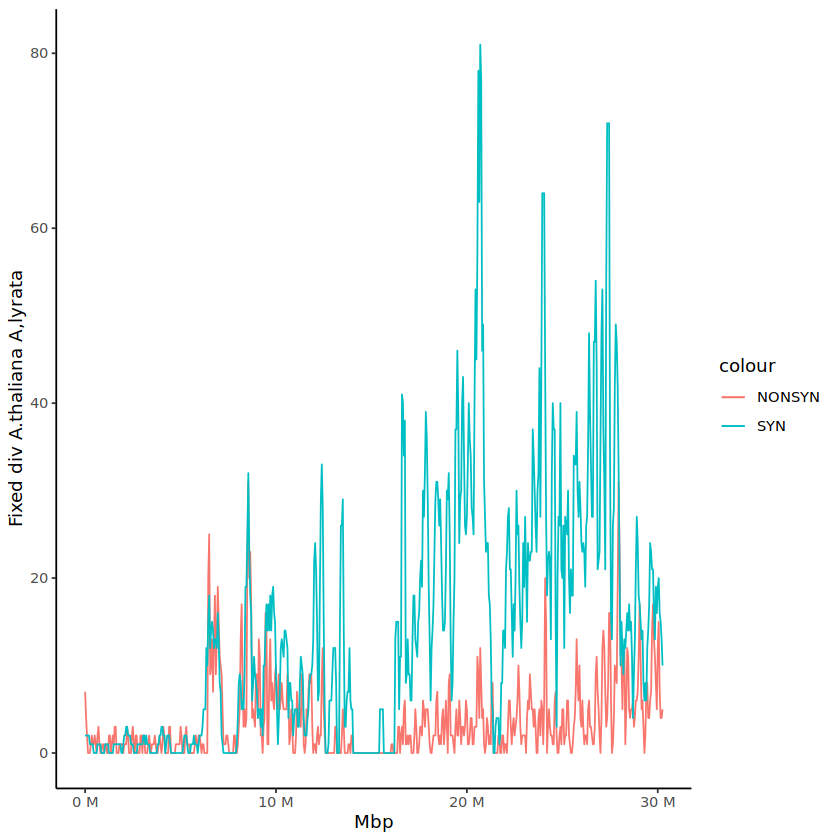

In [15]:
#Plot them together 
ggplot(pol_non_pol, aes(start)) + 
  geom_line(aes(y = fix_div.x, colour = "NONSYN")) + 
  geom_line(aes(y = fix_div.y, colour = "SYN")) +scale_x_continuous(labels = unit_format(unit = "M", scale = 1e-6))+theme_classic() +xlab("Mbp") + ylab("Fixed div A.thaliana A,lyrata")
